In [2]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\WBGT-文献及初稿\8月修改\WBGT_data\Trend')


In [3]:
data = pd.read_csv('Yearly_Avg_HW.csv',encoding = 'GBK')
data = pd.DataFrame(data)

# data = data['events']
data.head()

,Year,HWN,HWF,HWD,HWA,HWM
0,1980,0.158009,1.094721,0.925179,0.091768,0.051096
1,1981,0.580166,5.923382,5.776081,0.515060,0.308136
2,1982,0.299617,2.957190,2.850389,0.290895,0.167028
3,1983,0.208794,1.647950,1.616990,0.132011,0.075962
4,1984,0.237838,1.862460,1.818102,0.143781,0.082797


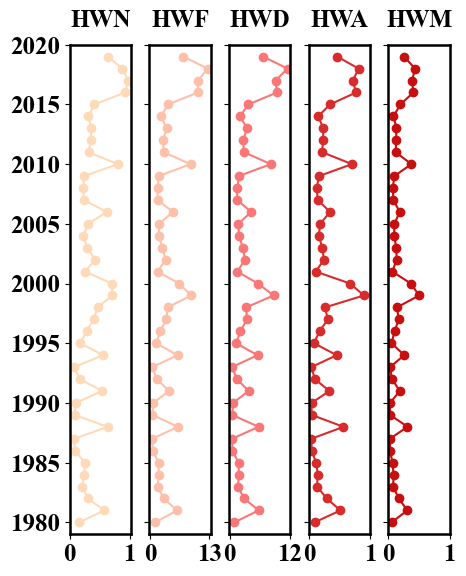

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
data = pd.read_csv('Yearly_Avg_HW.csv')

# Prepare the data
years = data['Year']
indices = ['HWN', 'HWF', 'HWD', 'HWA', 'HWM']
# colors = ['blue', 'green', 'red', 'purple', 'orange']
colors = ['peachpuff','#FFC0AA', '#FB7676', '#D82C2C', '#C80F0F']

# Set plot parameters
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, axes = plt.subplots(1, len(indices), figsize=(5, 6.1), sharey=True)

# Loop through each index and create subplots
for i, (index, color) in enumerate(zip(indices, colors)):
    ax = axes[i]
    ax.plot(data[index], years, marker='o',color=color)
    ax.set_title(index, fontsize=17.5,fontweight='bold', y=1.02)
    # Determine if the values are small enough to warrant decimal places
    min_val = min(data[index])
    max_val = max(data[index])
    if max_val - min_val < 1.0:
        ticks = [0, 1]
#         ticks = np.linspace(min_val, max_val, 2)
#         ticks = np.round(ticks, 1)  # Round to 1 decimal place
    else:
        ticks = np.linspace(int(min_val), int(max_val) + 1, 2)
#     ax.set_xticklabels(ax.get_xticks(), fontsize=17) 
    ax.set_xticks(ticks)
    
    # Color the tick labels
#     for ticklabel in ax.get_xticklabels():
#         ticklabel.set_color(color)

    ax.xaxis.tick_bottom()
    ax.set_ylim(min(years) - 1, max(years) + 1)

    for spine in ax.spines.values():
        spine.set_linewidth(1.8)
        spine.set_edgecolor("black")

# Set common Y-axis label
# axes[0].set_ylabel('Year')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust this value to make the subplots closer or further apart

plt.savefig('Colored_Xticks_Separated_Heatwave_Indices_Over_Years.png', dpi=300, facecolor="none", transparent=True, bbox_inches='tight')
plt.show()

In [116]:
import statsmodels.api as sm

#### Regressions, no intercept addition is needed because we're using SK LEARN HERE 

def lm_func(df, col):
    
    "simple linear model of a time series data, returns coef"
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
#     coef = int(model.params[1])
    #coef = int(coef)
            
    # R2 and P
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    return round(coef, 2), round(r2, 2), round(p, 3)

In [117]:
coef, r2, p = lm_func(data, 'HWN')
print(coef, r2, p )

0.01 0.21 0.002


In [118]:
coef, r2, p = lm_func(data, 'HWF')
print(coef, r2, p )

0.13 0.21 0.002


In [119]:
coef, r2, p = lm_func(data, 'HWD')
print(coef, r2, p )

0.11 0.2 0.003


In [120]:
coef, r2, p = lm_func(data, 'HWA')
print(coef, r2, p )

0.01 0.13 0.015


In [121]:
coef, r2, p = lm_func(data, 'HWM')
print(coef, r2, p )

0.0 0.11 0.023
